## First model:
First model: with reference to the Housing Price Project 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import sklearn
assert sklearn.__version__ >= "0.20"
## from HousingPriceProject.ipynb from Ava
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## fetching data

def get_quat_cashflow_apple():
    cwd = os.getcwd()
    file_path = os.path.join(cwd,"apple_quarterly_cash flow.csv")
    return pd.read_csv(file_path)

            
q_cashflow_apple = get_quat_cashflow_apple()
q_cashflow_apple.head()
q_cashflow_apple.info()
q_cashflow_apple.describe()
##

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   date                            21 non-null     object
 1   fiscalDateEnding                21 non-null     object
 2   reportedCurrency                21 non-null     object
 3   investments                     21 non-null     int64 
 4   changeInLiabilities             21 non-null     int64 
 5   cashflowFromInvestment          21 non-null     int64 
 6   otherCashflowFromInvestment     21 non-null     int64 
 7   netBorrowings                   21 non-null     int64 
 8   cashflowFromFinancing           21 non-null     int64 
 9   otherCashflowFromFinancing      21 non-null     int64 
 10  changeInOperatingActivities     21 non-null     object
 11  netIncome                       21 non-null     int64 
 12  changeInCash                    21 non-null     int6

,investments,changeInLiabilities,cashflowFromInvestment,otherCashflowFromInvestment,netBorrowings,cashflowFromFinancing,otherCashflowFromFinancing,netIncome,changeInCash,operatingCashflow,otherOperatingCashflow,depreciation,dividendPayout,stockSaleAndPurchase,changeInInventory,changeInAccountReceivables,changeInNetIncome,capitalExpenditures,changeInReceivables,changeInCashAndCashEquivalents
count,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01
mean,1.115714e+09,3.926286e+09,-2.063524e+09,-3.315238e+08,2.152619e+09,-1.598814e+10,-6.905714e+08,1.404719e+10,7.904286e+08,1.884210e+10,-6.711905e+08,2.754000e+09,-3.354476e+09,-1.409571e+10,-1.449524e+08,1.623714e+09,2.701905e+08,2.847714e+09,-1.339429e+09,7.904286e+08
std,1.343609e+10,1.786311e+10,1.354296e+10,3.426695e+08,5.331856e+09,1.121903e+10,7.074454e+08,5.290634e+09,8.213600e+09,8.057506e+09,2.429861e+09,2.650766e+08,2.386394e+08,6.391062e+09,1.151812e+09,6.370446e+09,7.536861e+09,7.655760e+08,1.256734e+10,8.213600e+09
min,-1.606000e+10,-2.651200e+10,-2.045000e+10,-1.088000e+09,-6.011000e+09,-3.224900e+10,-2.883000e+09,7.796000e+09,-1.308800e+10,8.363000e+09,-6.069000e+09,2.332000e+09,-3.656000e+09,-2.477500e+10,-3.241000e+09,-1.094500e+10,-3.245200e+10,1.565000e+09,-2.262400e+10,-1.308800e+10
25%,-1.047300e+10,-7.931000e+09,-1.359000e+10,-6.020000e+08,-7.030000e+08,-2.540700e+10,-1.077000e+09,1.071400e+10,-4.431000e+09,1.252300e+10,-2.089000e+09,2.548000e+09,-3.539000e+09,-1.876300e+10,-6.890000e+08,-2.093000e+09,1.219000e+09,2.277000e+09,-1.025700e+10,-4.431000e+09
50%,-1.560000e+09,-9.000000e+08,-4.470000e+09,-2.630000e+08,2.310000e+08,-1.911600e+10,-4.060000e+08,1.156100e+10,-1.214000e+09,1.612600e+10,-3.580000e+08,2.745000e+09,-3.375000e+09,-1.589100e+10,-1.370000e+08,1.768000e+09,1.830000e+09,2.810000e+09,-2.140000e+08,-1.214000e+09
75%,7.916000e+09,1.439800e+10,5.531000e+09,-6.700000e+07,4.395000e+09,-7.501000e+09,-1.960000e+08,1.789100e+10,4.750000e+09,2.669000e+10,5.500000e+08,2.933000e+09,-3.187000e+09,-7.514000e+09,4.340000e+08,5.722000e+09,2.548000e+09,3.355000e+09,6.681000e+09,4.750000e+09
max,3.289400e+10,5.292800e+10,2.871000e+10,1.950000e+08,1.632100e+10,6.884000e+09,-1.120000e+08,2.875500e+10,1.885800e+10,3.876300e+10,5.266000e+09,3.395000e+09,-2.902000e+09,-5.778000e+09,1.942000e+09,1.130100e+10,3.202000e+09,4.195000e+09,2.846800e+10,1.885800e+10


### Plotting the data

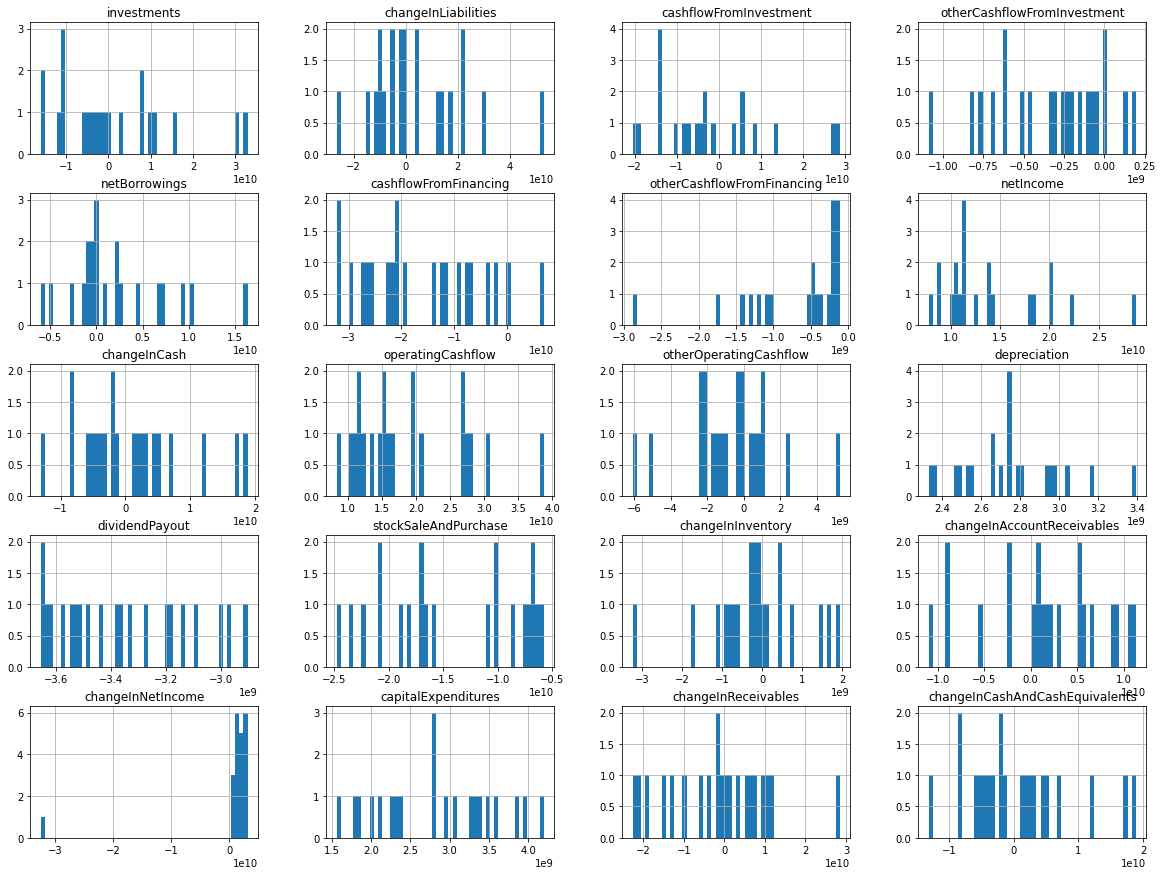

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
q_cashflow_apple.hist(bins=50, figsize=(20,15))
# save_fig("apple_qcashflow_histogram_plots")
plt.show()

### Plotting every file

amazon_annual_cash flow


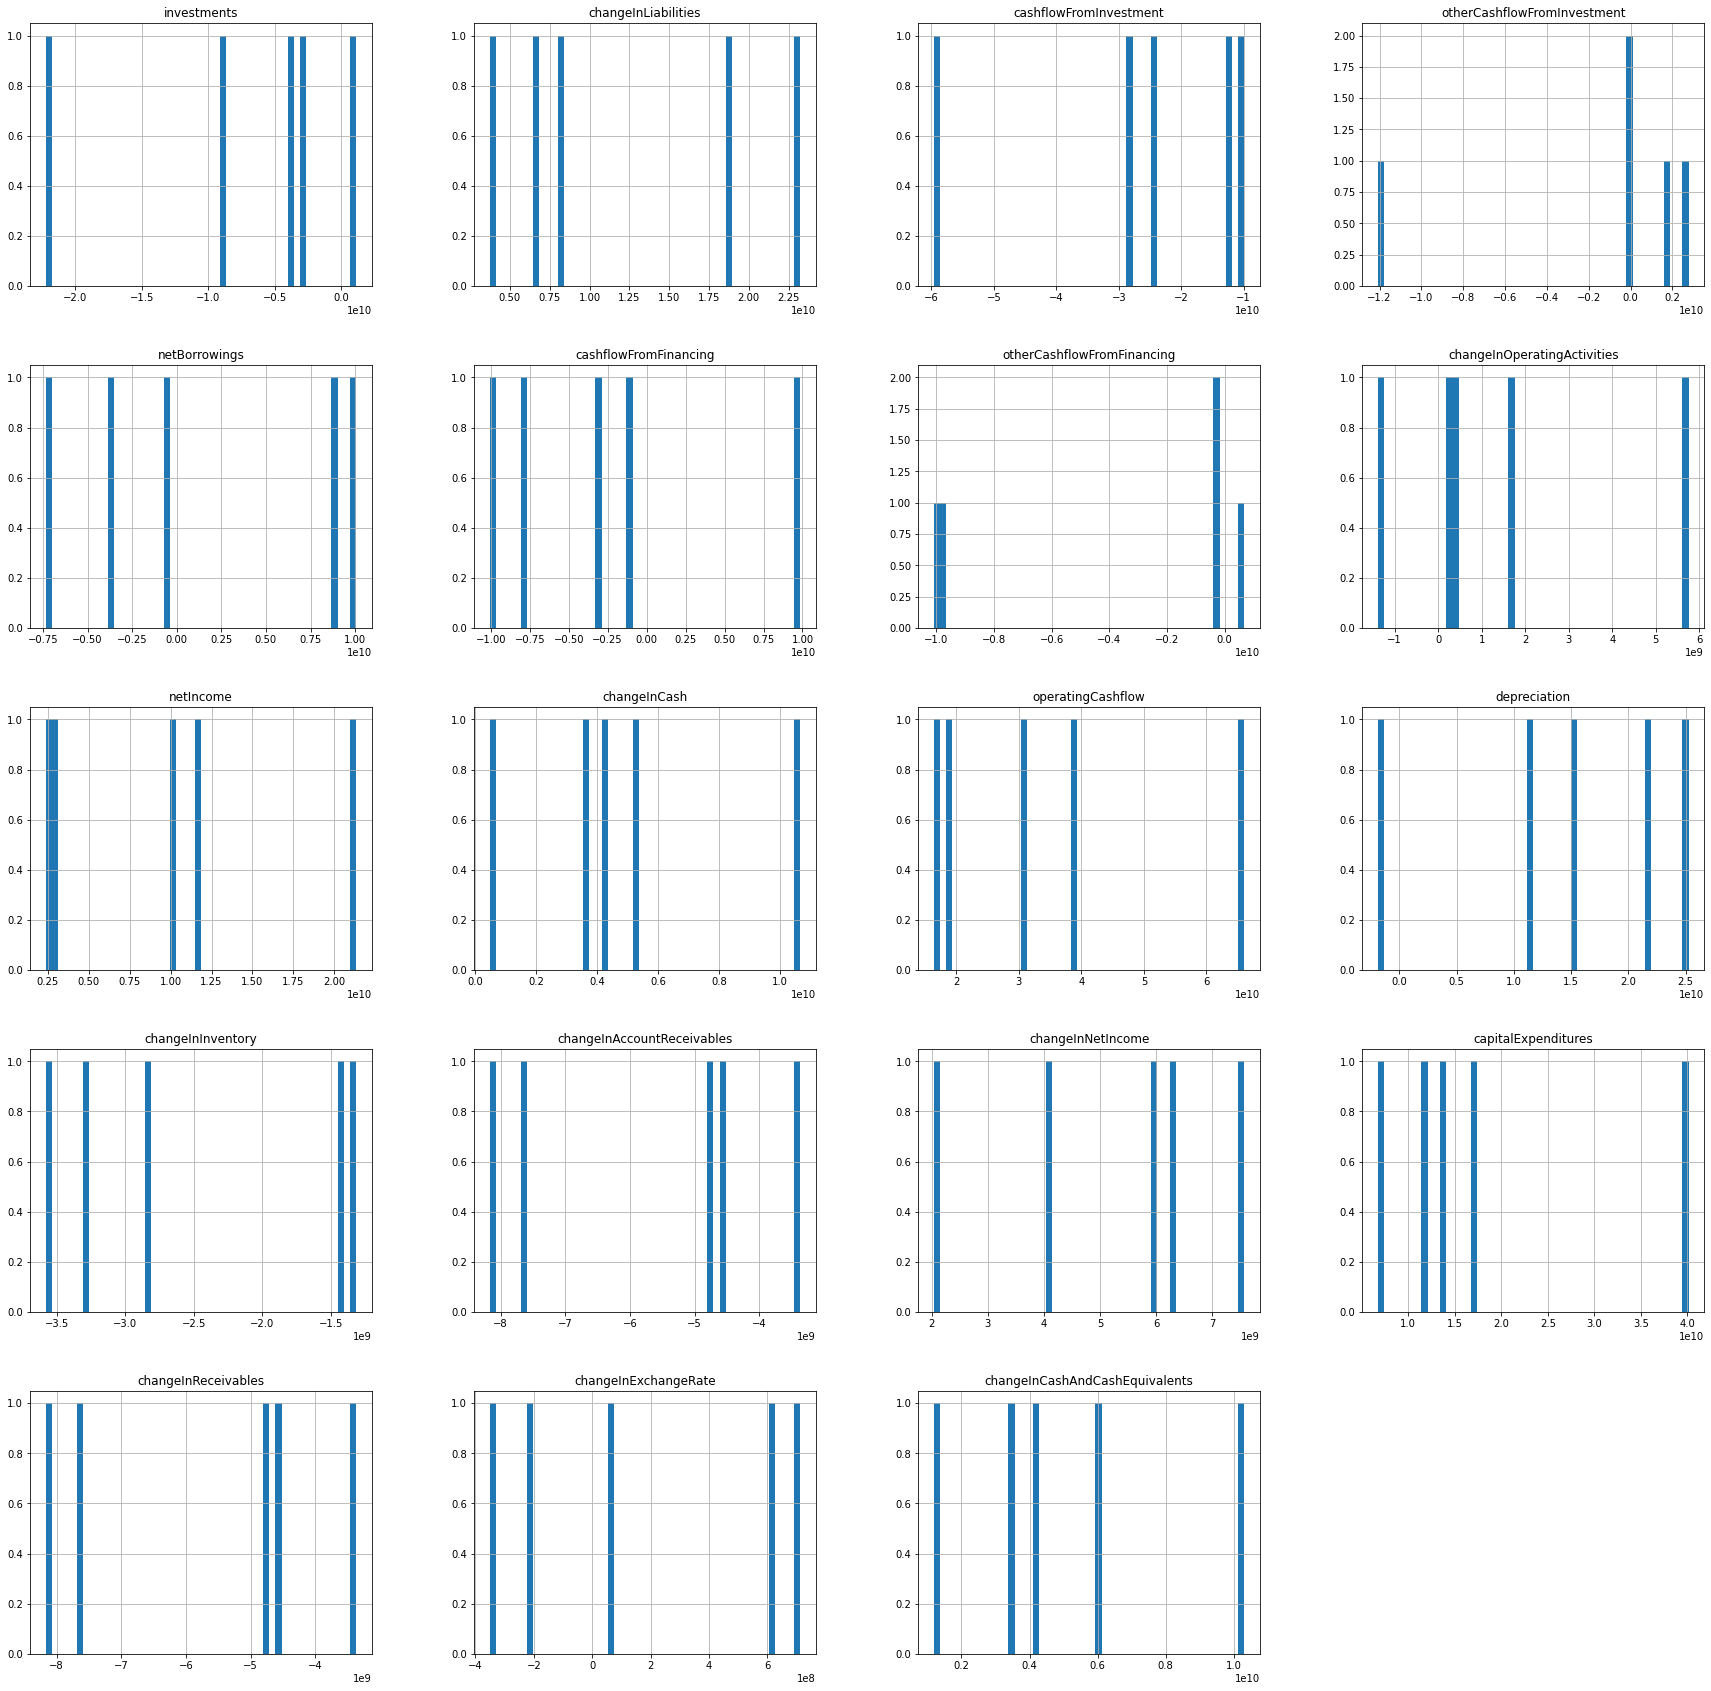

amazon_quarterly_cash flow


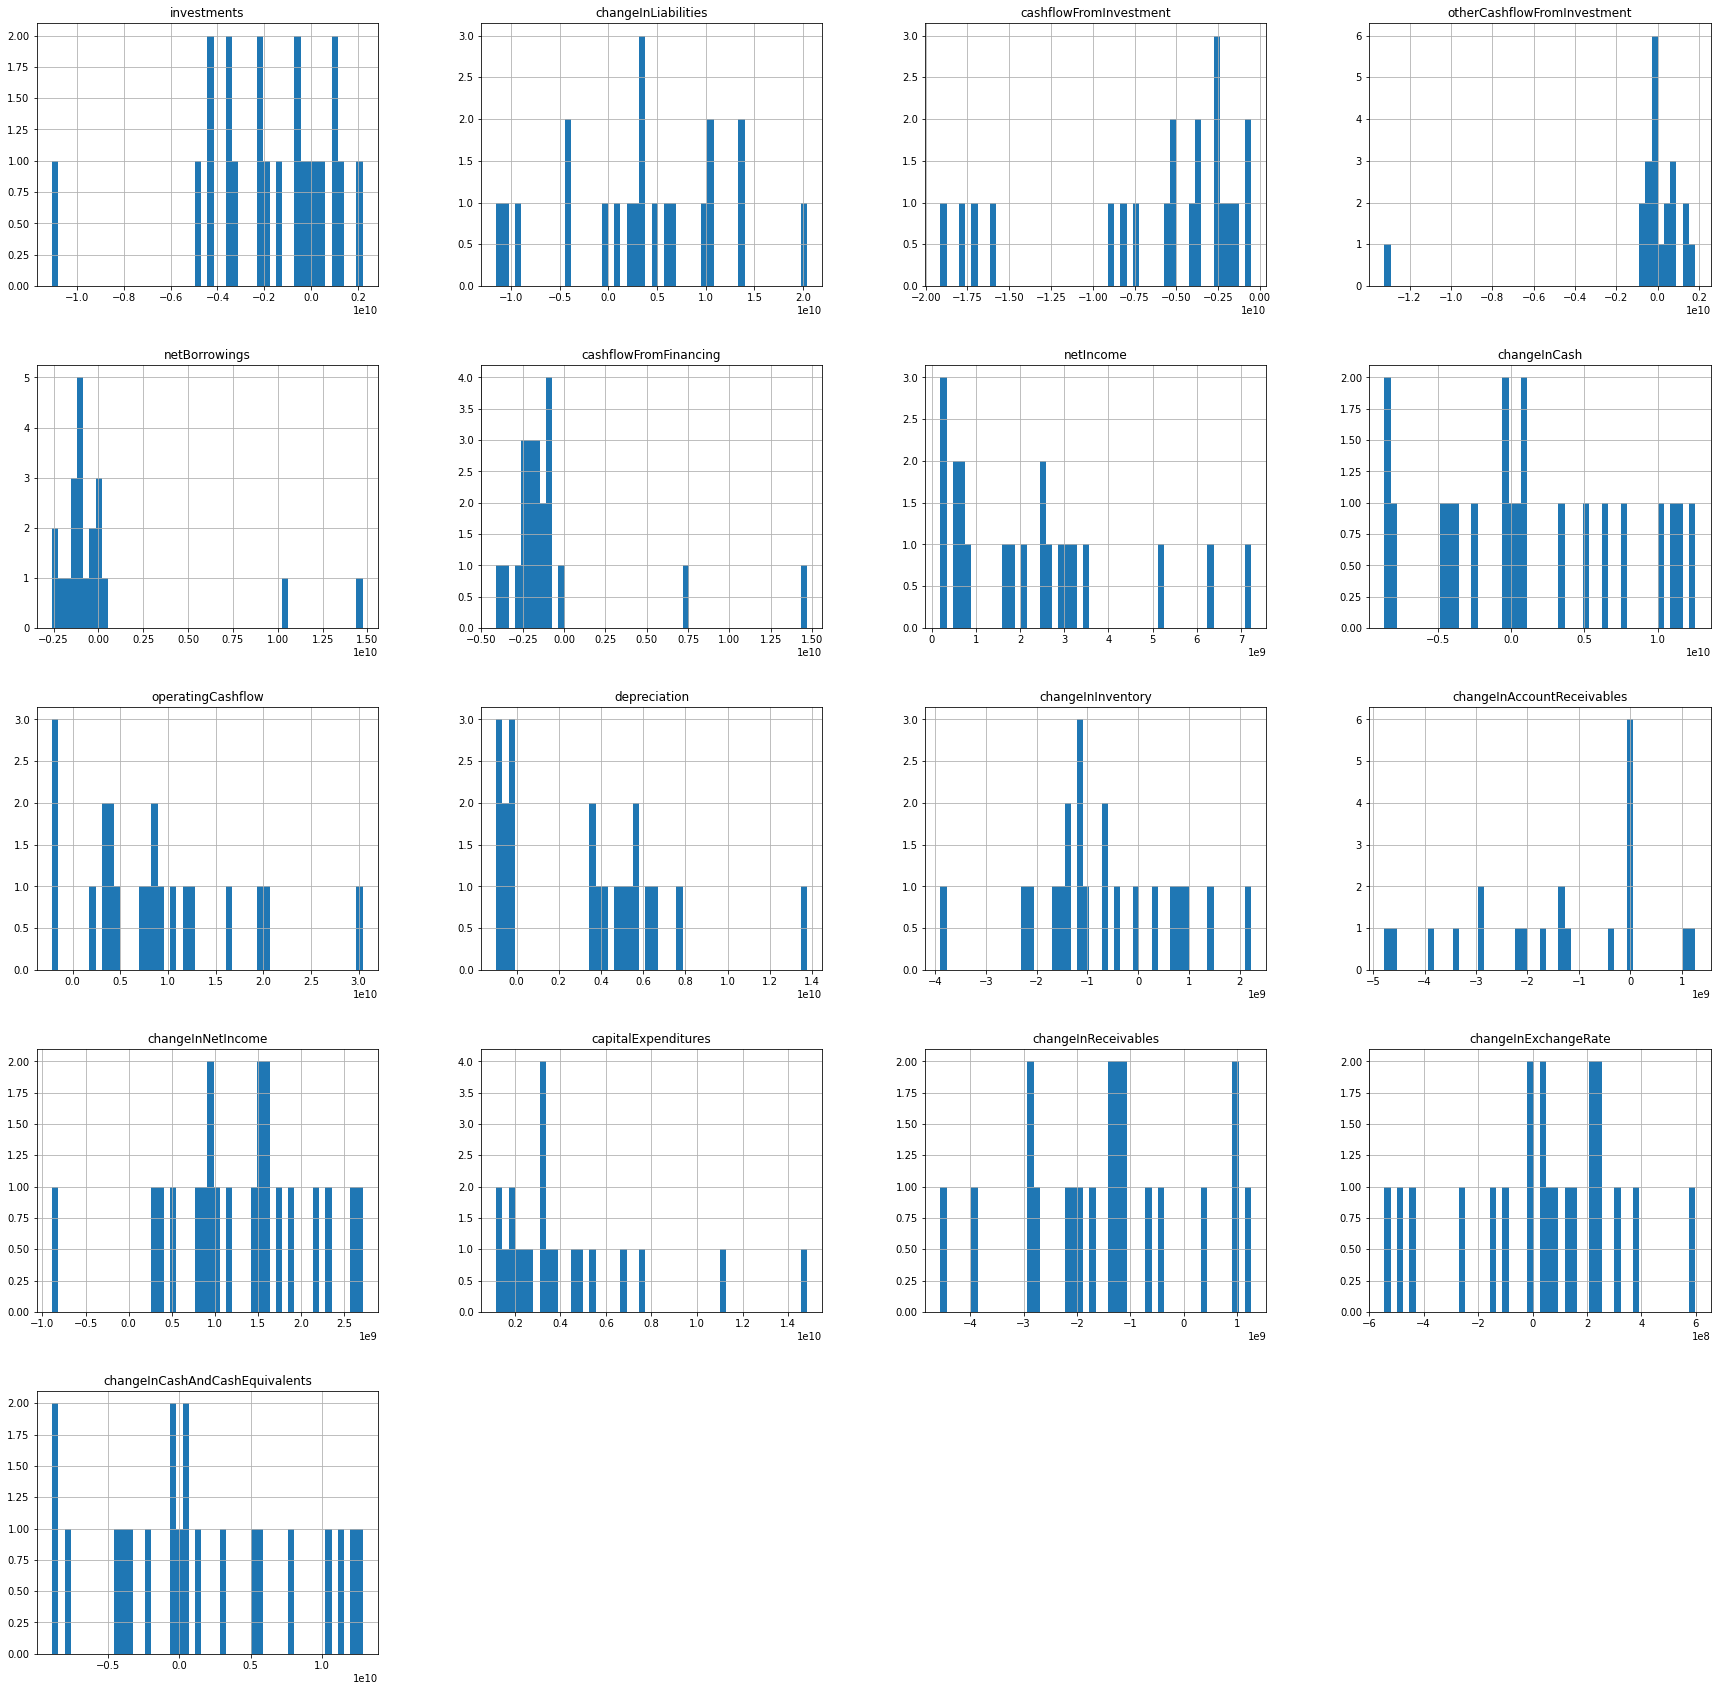

apple_annual_cash flow


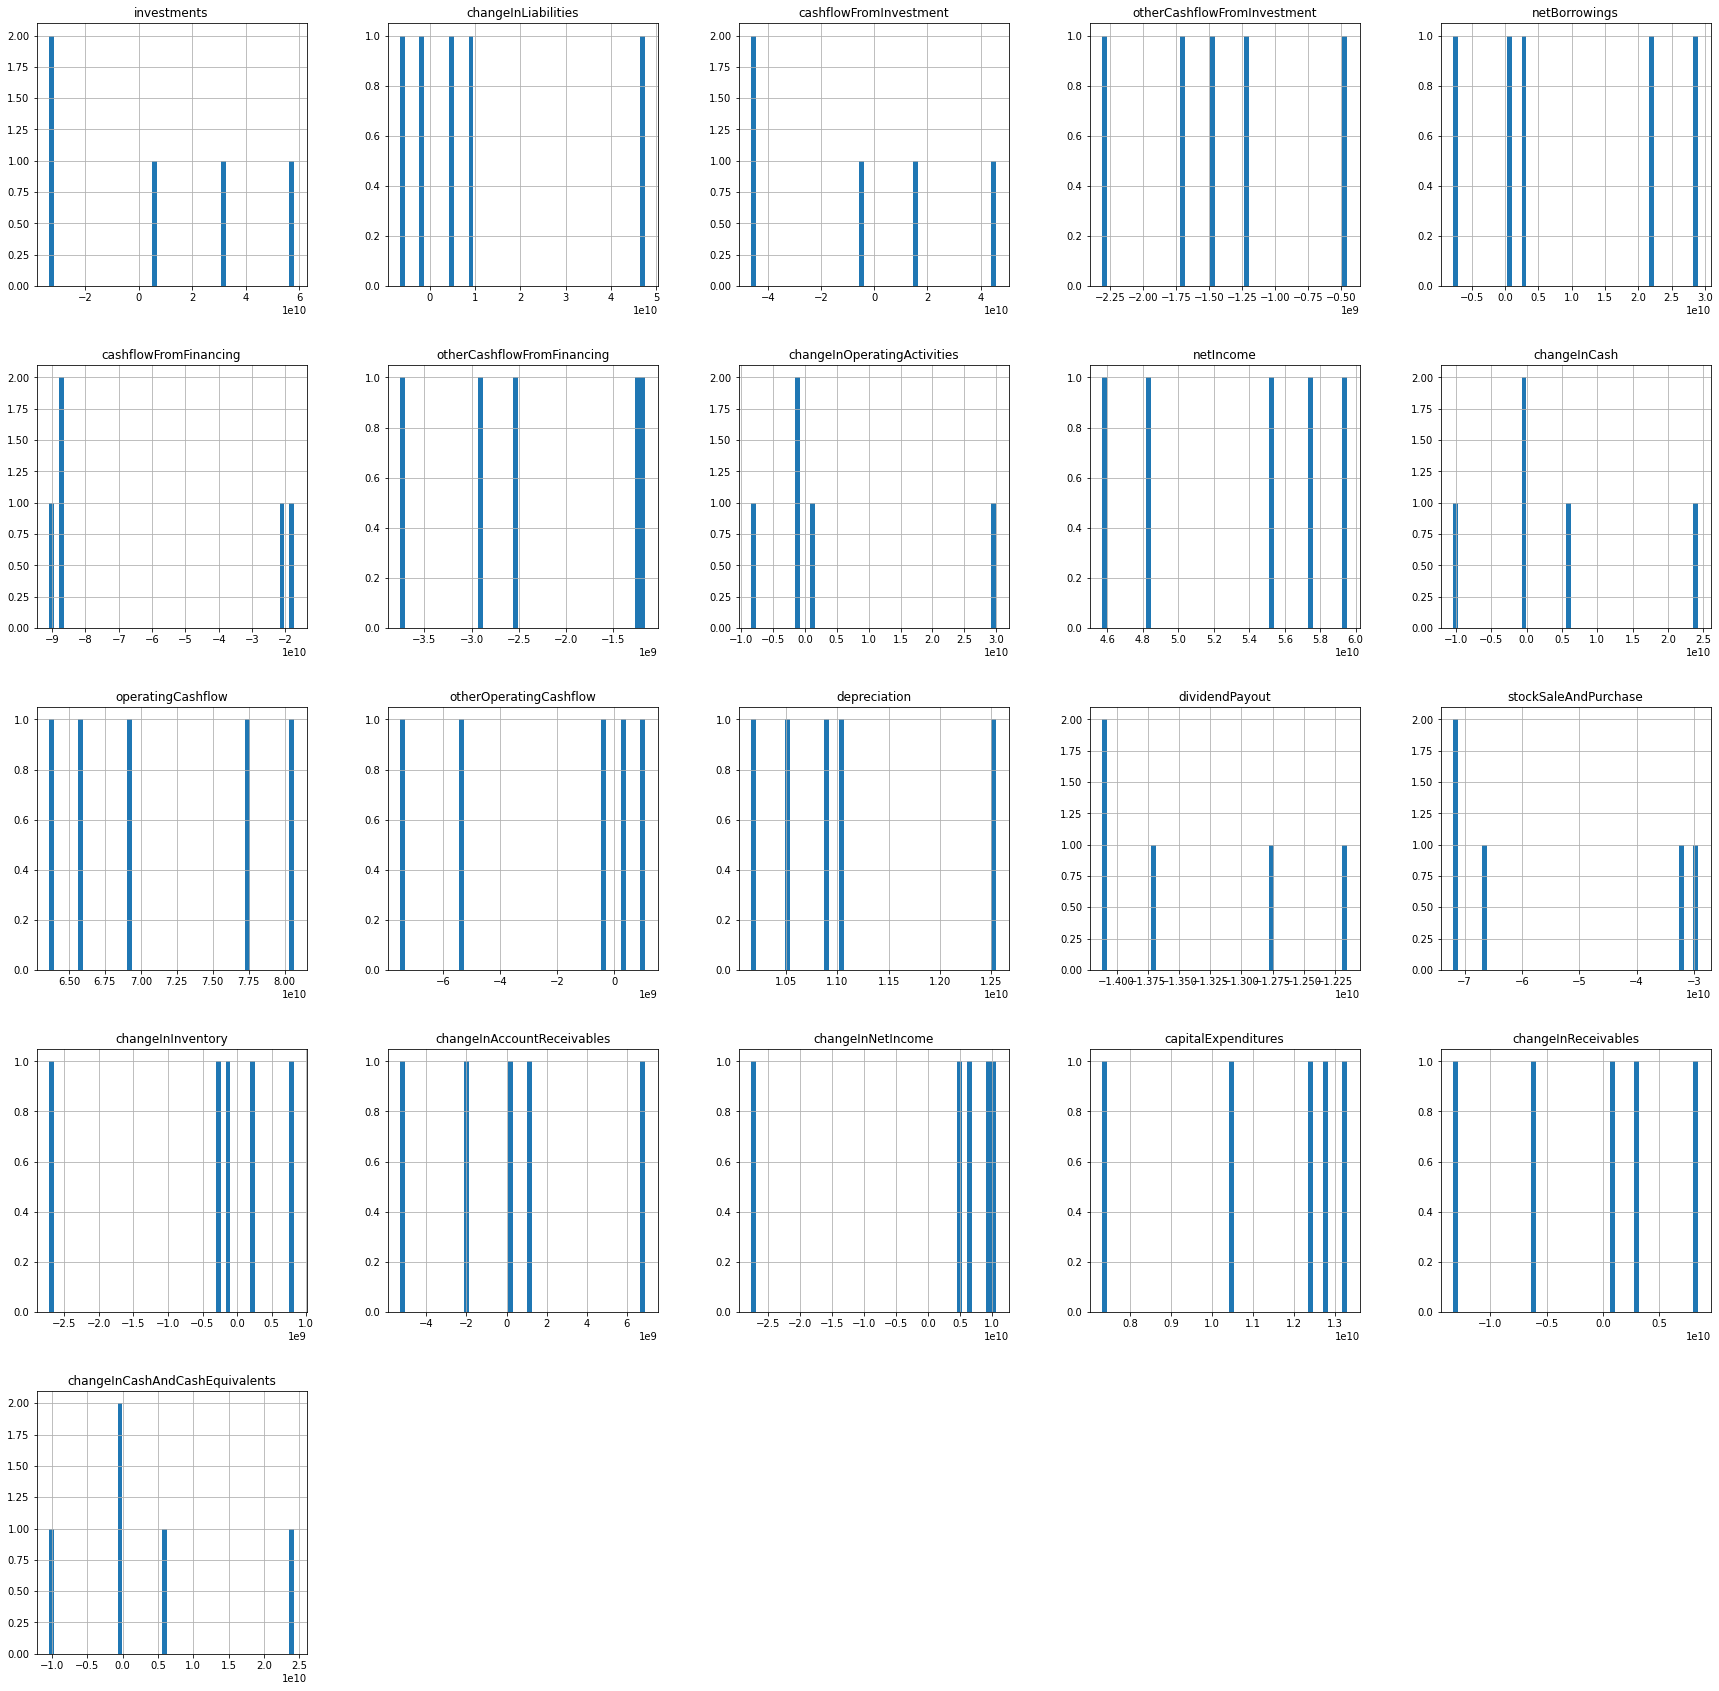

apple_quarterly_cash flow


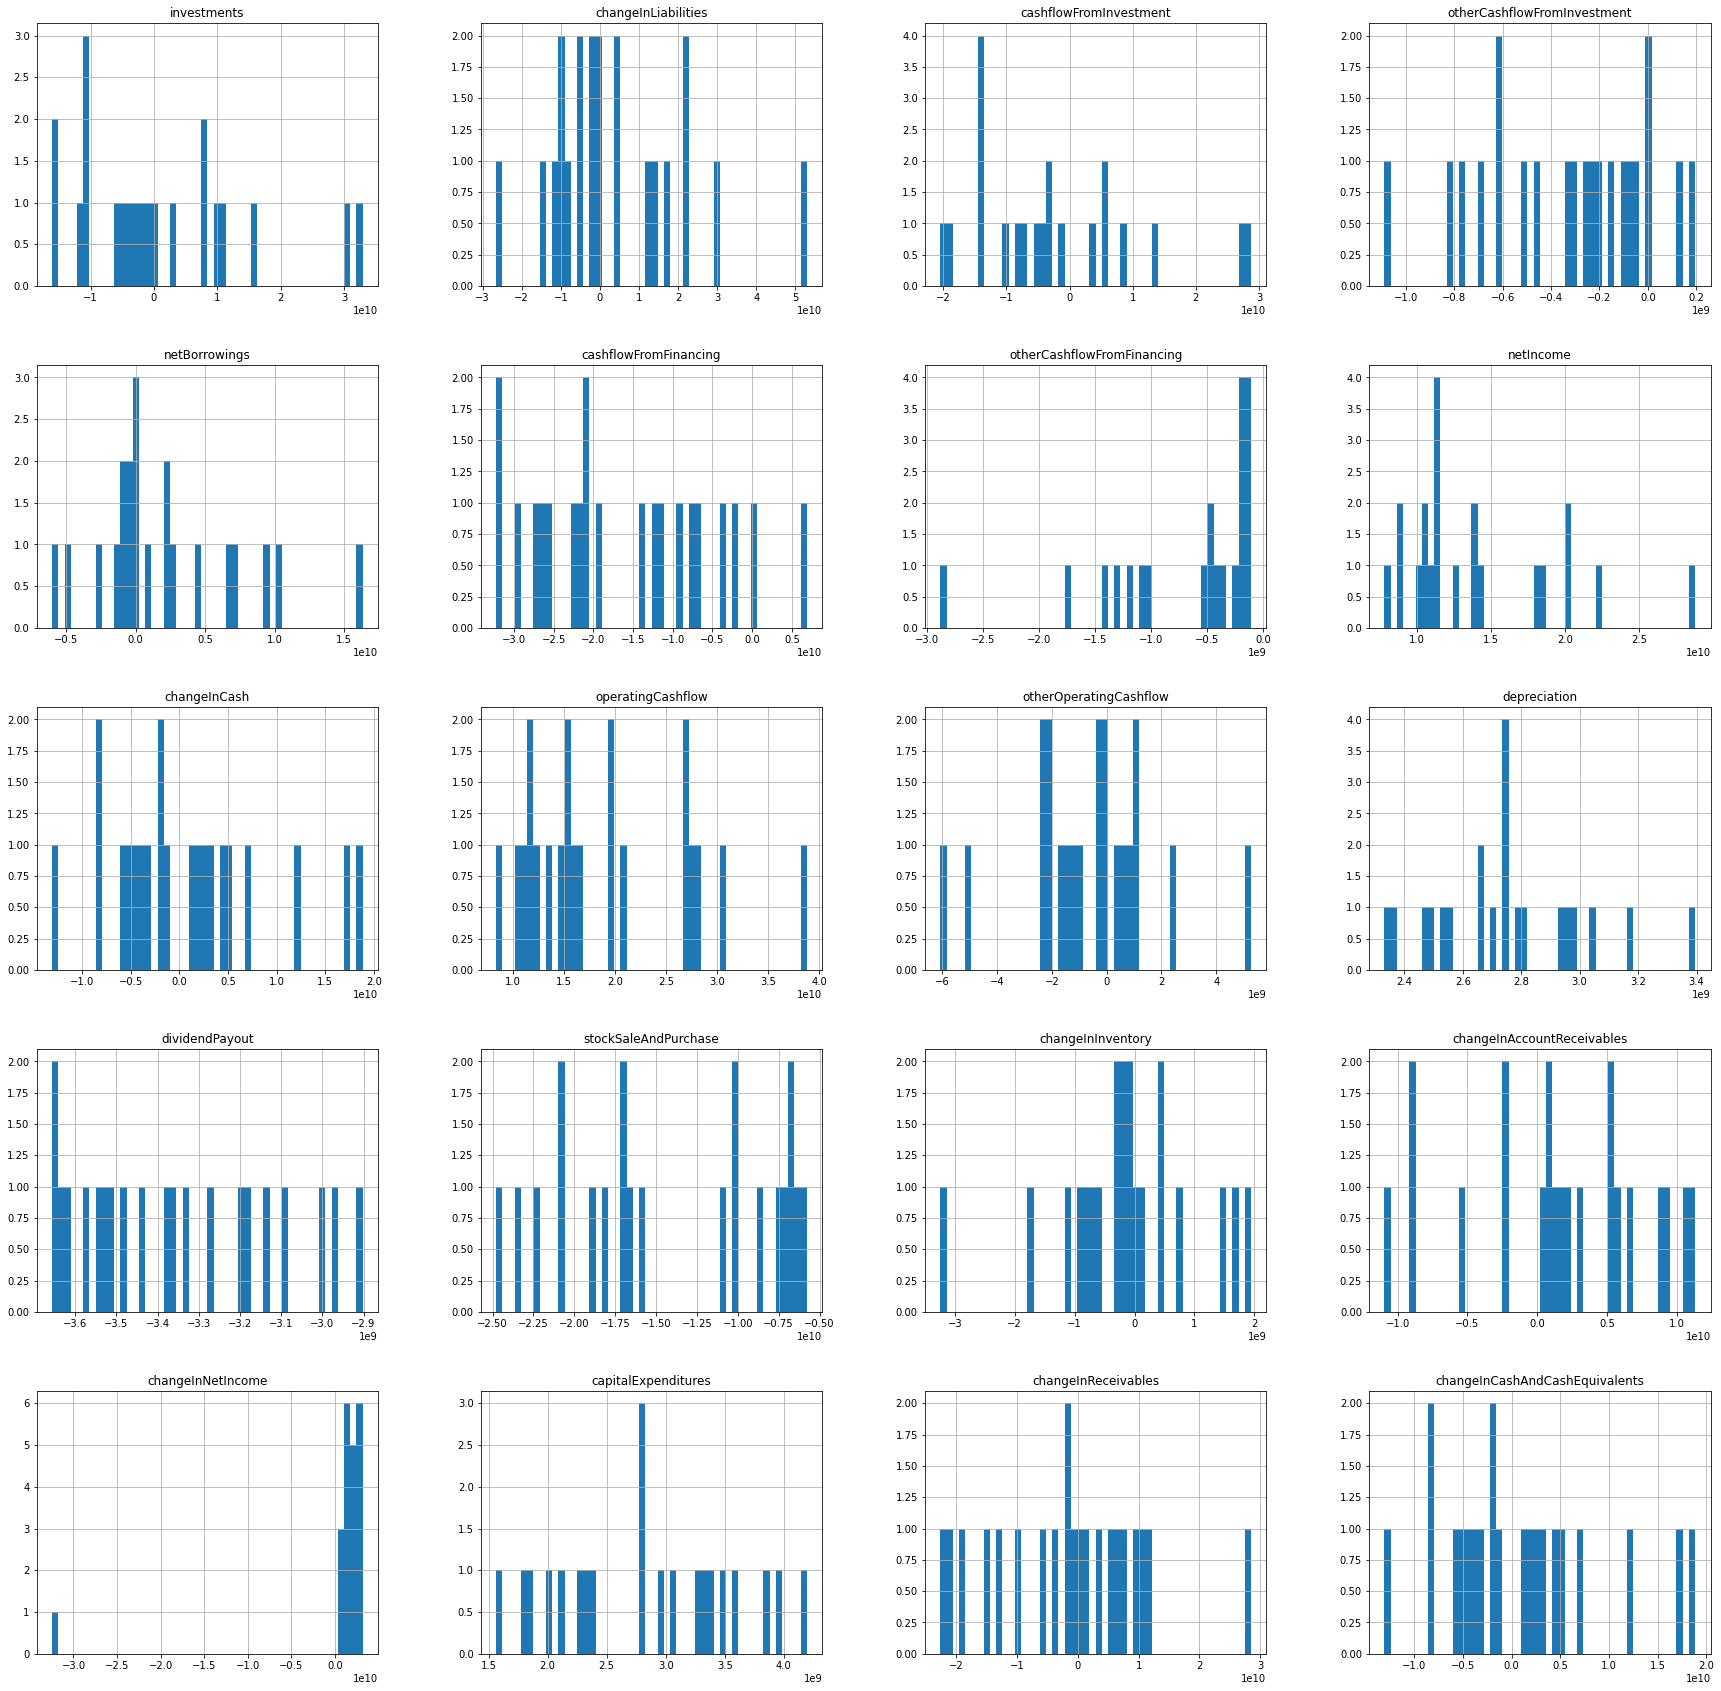

facebook_annual_cash flow


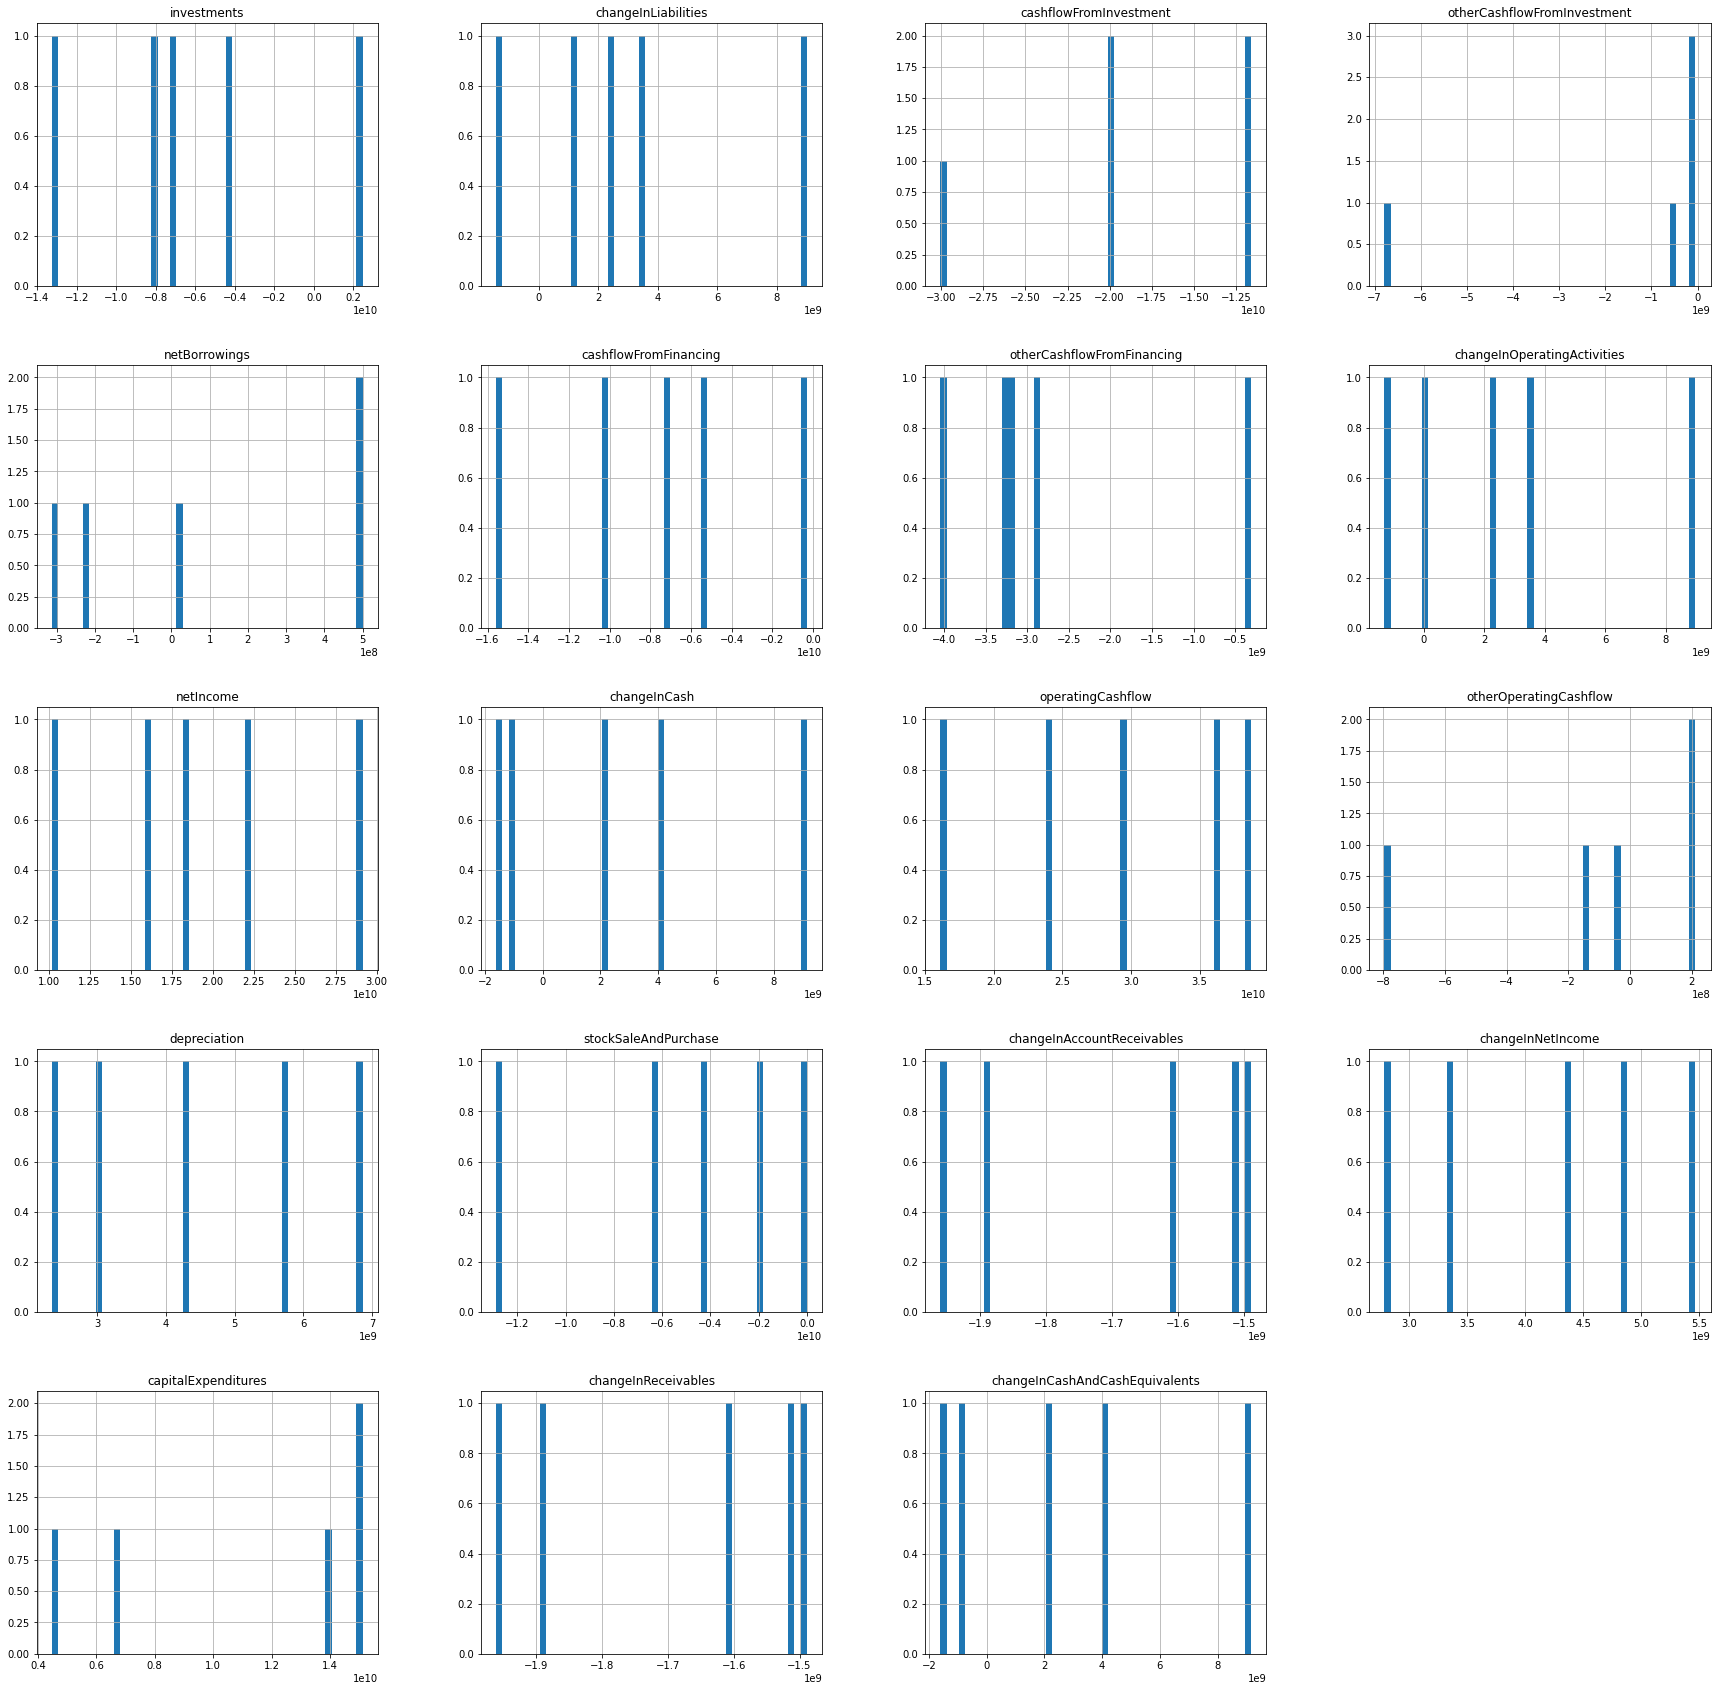

facebook_quarterly_cash flow


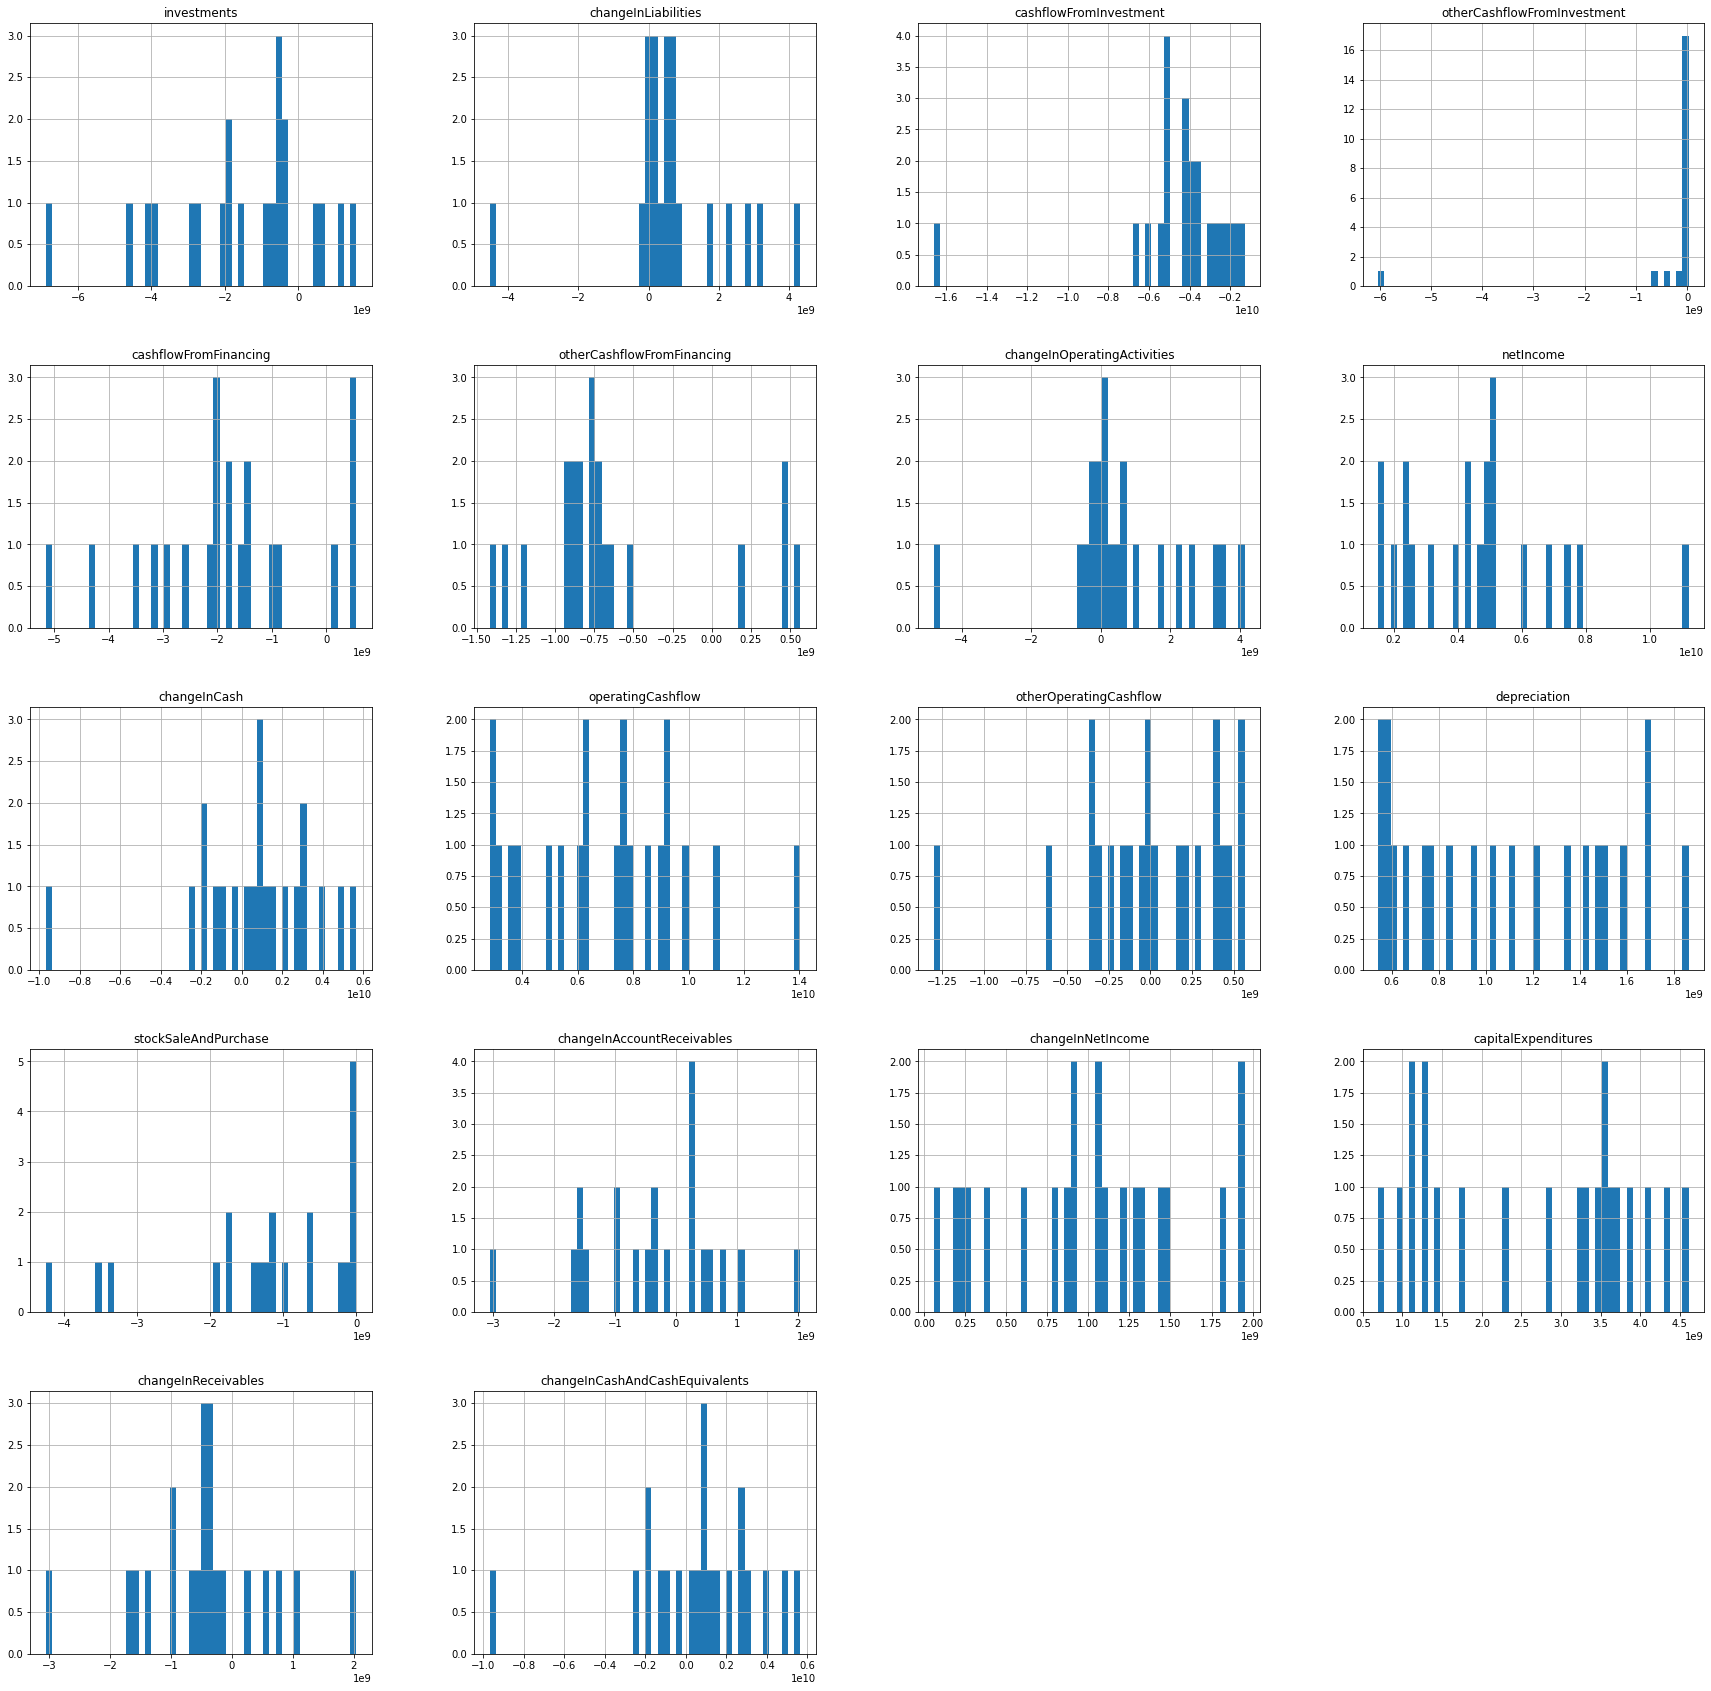

google_annual_cash flow


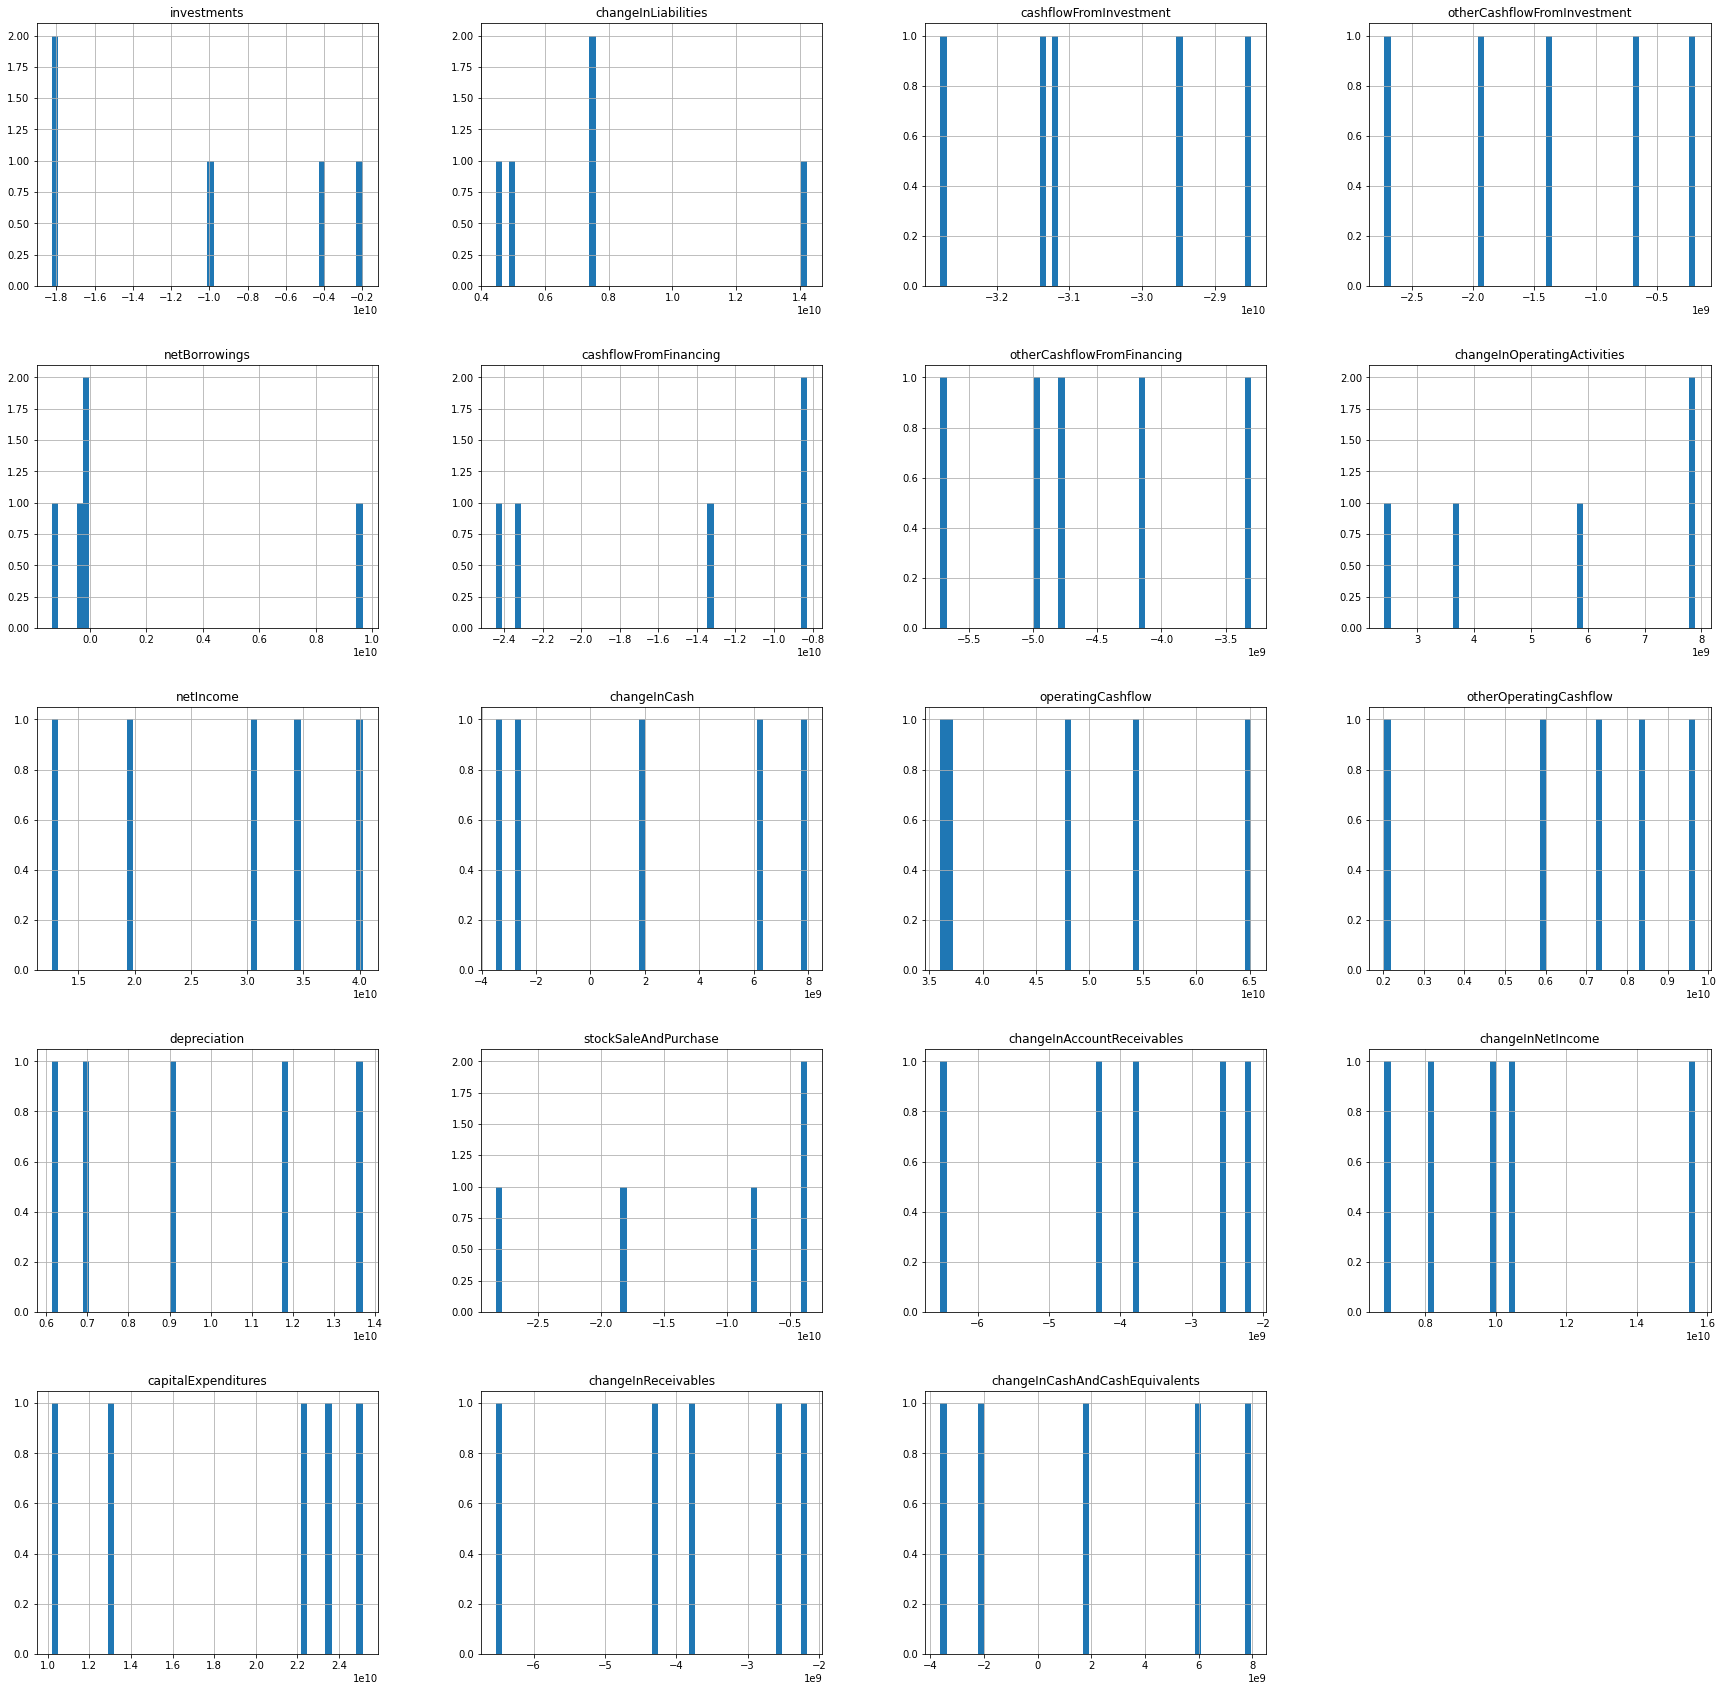

google_quarterly_cash flow


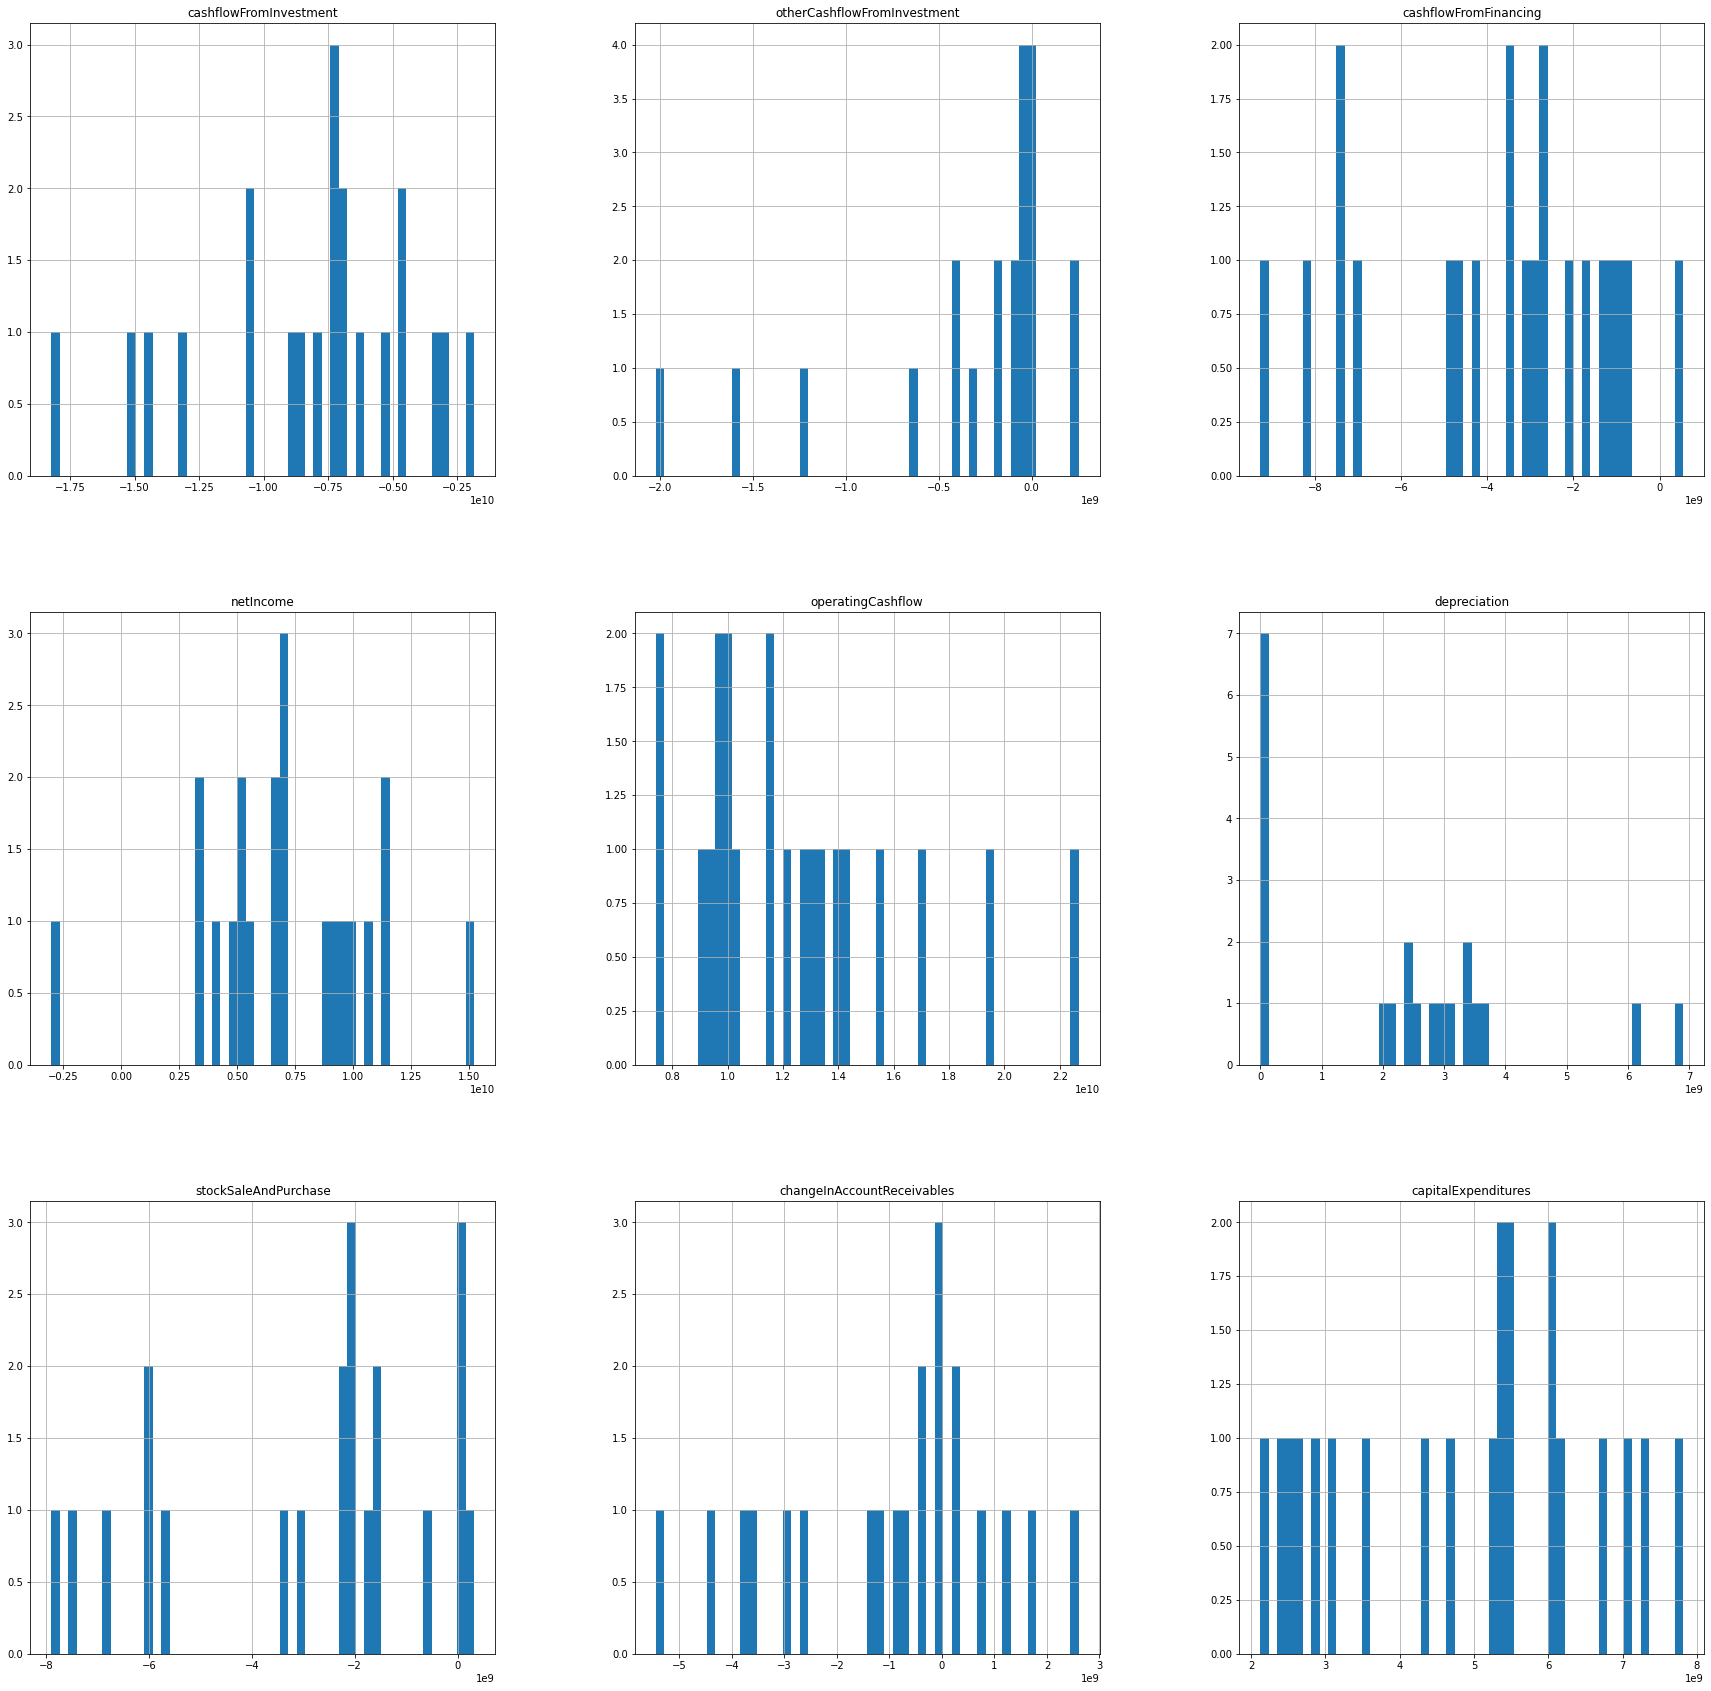

netflix_annual_cash flow


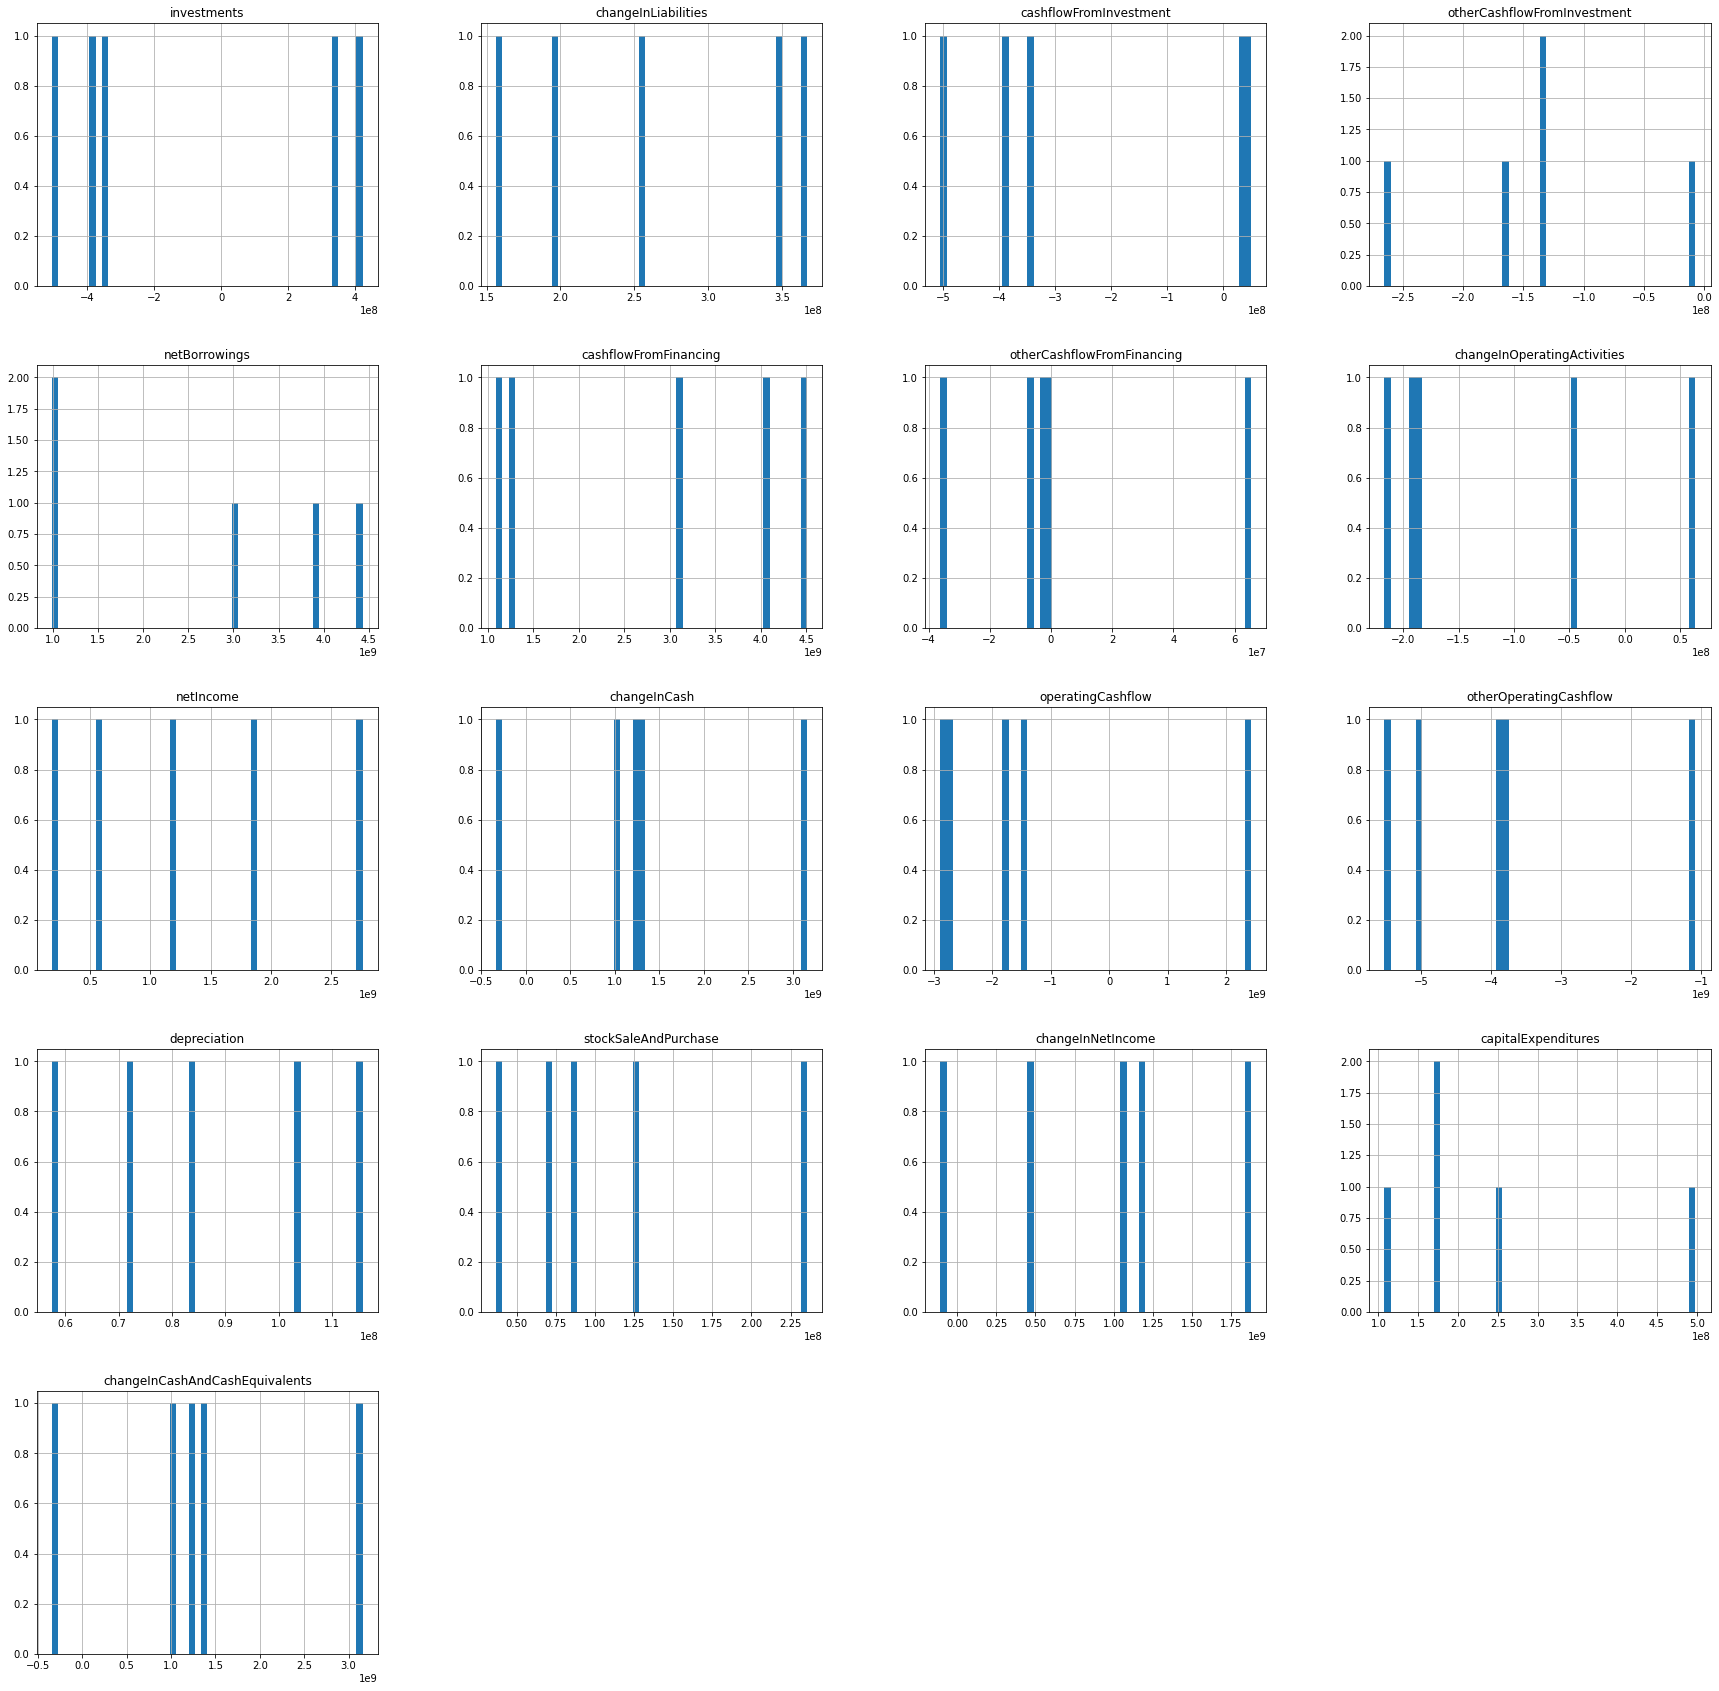

netflix_quarterly_cash flow


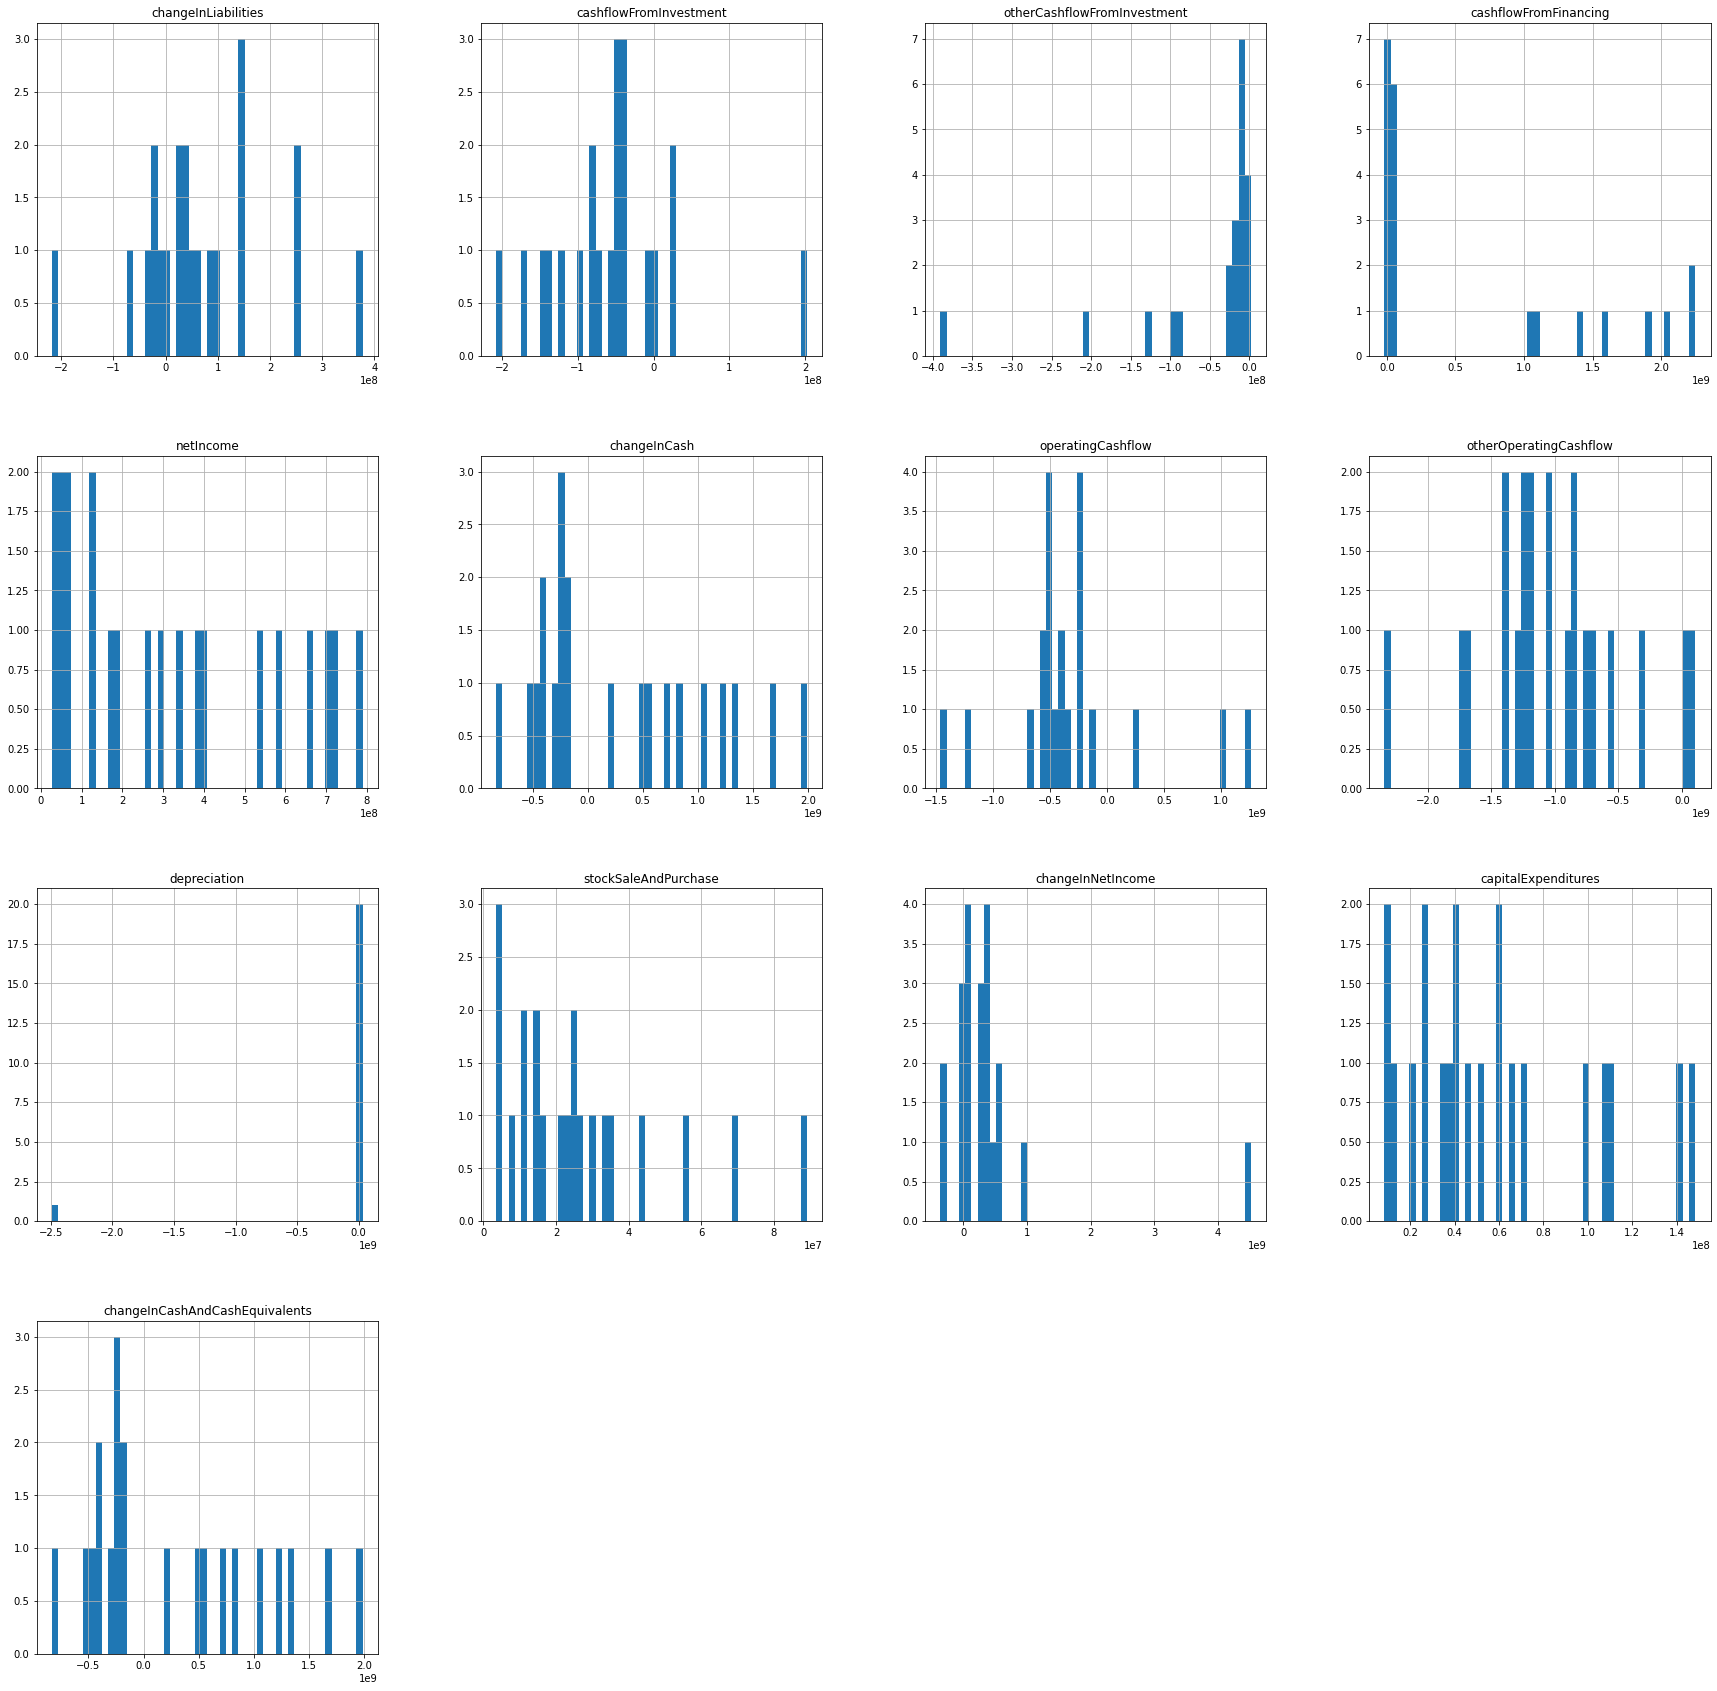

In [4]:
def get_datafrom_csv():
    cwd = os.getcwd()
    for filename in os.listdir(cwd):
        if filename.endswith(".csv"):
            print(filename.split(".")[0])
            file_path = os.path.join(cwd,filename)
            df = pd.read_csv(file_path)
            %matplotlib inline
            df.hist(bins=50, figsize=(30,30))
            plt.show()
get_datafrom_csv()

### using train_test_split

In [5]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(q_cashflow_apple, test_size=0.2, random_state=42)
test_set.head()

,date,fiscalDateEnding,reportedCurrency,investments,changeInLiabilities,cashflowFromInvestment,otherCashflowFromInvestment,netBorrowings,cashflowFromFinancing,otherCashflowFromFinancing,...,depreciation,dividendPayout,stockSaleAndPurchase,changeInInventory,changeInAccountReceivables,changeInNetIncome,capitalExpenditures,changeInReceivables,changeInExchangeRate,changeInCashAndCashEquivalents
0,1970-01-01 00:00:00.000000000,2020-12-31,USD,-5279000000,29629000000,-8584000000,195000000,-978000000,-32249000000,-2883000000,...,2666000000,-3613000000,-24775000000,-950000000,-10945000000,1987000000,3500000000,-21139000000,None,-2070000000
17,1970-01-01 00:00:00.000000017,2016-09-30,USD,-3419000000,14398000000,-7397000000,-1000000,2581000000,-6482000000,-193000000,...,2548000000,-3092000000,-5778000000,-301000000,1044000000,777000000,3977000000,-10257000000,None,2247000000
15,1970-01-01 00:00:00.000000015,2017-03-31,USD,-11357000000,-11215000000,-14202000000,130000000,10469000000,465000000,-112000000,...,2332000000,-3004000000,-6888000000,-198000000,8695000000,2652000000,2975000000,7373000000,None,-1214000000
1,1970-01-01 00:00:00.000000001,2020-09-30,USD,7468000000,11774000000,5531000000,-153000000,-703000000,-21357000000,-406000000,...,2702000000,-3511000000,-16737000000,-137000000,1768000000,1324000000,1784000000,-5364000000,None,4750000000
8,1970-01-01 00:00:00.000000008,2018-12-31,USD,9422000000,-7931000000,5844000000,-223000000,6000000,-13676000000,-1318000000,...,3395000000,-3568000000,-8796000000,-1076000000,5130000000,1558000000,3355000000,12035000000,None,18858000000


<AxesSubplot:>

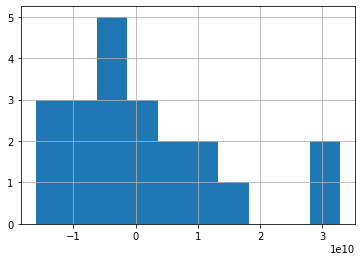

In [8]:
q_cashflow_apple["investments"].hist()
# q_cashflow_apple["changeInNetIncome"].hist()

In [9]:
q_cashflow_apple["investments_cat"] = pd.cut(q_cashflow_apple["investments"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
q_cashflow_apple["investment_cat"].value_counts()


KeyError: 'investment_cat'

## Second model:
Second one: with reference to the SVM 

## Third model:

Third one: Try Recursive/Recurrent Neural Network